# KE5105 - Building Electrical Consumption Forecasting

# Extract, Transform and Load Data 1 - Data Exploration

## Summary of Findings

* The time series dataset covered the period from May 15 to Jul 18.
* File sizes are not constant over time, likely indicating missing data as the data should comprise regular readings from the resource meters (which should produce constant file sizes).

#### Group 1 Buildings (10)
The periods of **data outage** are :
* May 15 for 6 buildings
* Apr 17, Jun 17 to Dec 17 for all buildings; in May 17 all buildings have very small files.
* The file sizes for SDE-3 appears different (lower) after the data outage Apr-Dec 17.

#### Group 2 Buildings (95)
The periods of complete **data outage** for all group 2 buildings are :
* May 15 to Nov 16
* Apr 17, Jun 17 to Dec 17; in May 17 all buildings have very small files.
* There appear to be some buidings with large data losses (previously mentioned MD4). They will be looked into in a later analysis.

#### Partial Data Losses
These are the buildings affected by major data loss (small files) :
* Dec 16 - HSE15
* Mar 17 - S12
* May 17 - all buildings in both groups
* Jan-Jul 17 - S10

## Load Libraries

In [1]:
%matplotlib inline

import myUtilities as myUtils
import pandas as pd
import numpy as np

## Check the list of files available for each building. There should be a csv file for each building for each month e.g. SDE-1_Jul2015.csv

In [2]:
# Load the data summary by files.
file_list = myUtils.get_num_files_by_bldg_mth()

In [3]:
file_list[0:10]

[['NUS Museum', 2018, 5, 96638],
 ['Central Library Annex', 2018, 5, 96566],
 ['Brenner Center of Molecular Medicine', 2018, 5, 101035],
 ['SDE-2', 2018, 5, 77246],
 ['SDE-3', 2018, 5, 252323],
 ['S4A', 2018, 5, 78783],
 ['E2', 2018, 5, 142747],
 ['MM Building', 2018, 5, 118982],
 ['E4', 2018, 5, 190339],
 ['S17', 2018, 5, 142760]]

In [4]:
# Convert the files list to data frame to facilitate exploration.
files_df = pd.DataFrame(file_list, columns=['name', 'year', 'month', 'file_size'])

In [5]:
files_df.head()

,name,year,month,file_size
0,NUS Museum,2018,5,96638
1,Central Library Annex,2018,5,96566
2,Brenner Center of Molecular Medicine,2018,5,101035
3,SDE-2,2018,5,77246
4,SDE-3,2018,5,252323


In [6]:
# Check if there are any missing data due to incomplete file names. There are none.
files_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 4 columns):
name         1446 non-null object
year         1446 non-null int64
month        1446 non-null int64
file_size    1446 non-null int64
dtypes: int64(3), object(1)
memory usage: 45.3+ KB


In [7]:
files_df.describe()

,year,month,file_size
count,1446.000000,1446.000000,1446.000000
mean,2017.254495,4.616874,108002.470263
std,0.896107,3.141832,68397.009491
min,2015.000000,1.000000,22.000000
25%,2017.000000,2.000000,69801.500000
50%,2018.000000,4.000000,96499.500000
75%,2018.000000,6.000000,142763.000000
max,2018.000000,12.000000,468043.000000


The data ranges look correct. There are some small files that need looking into.

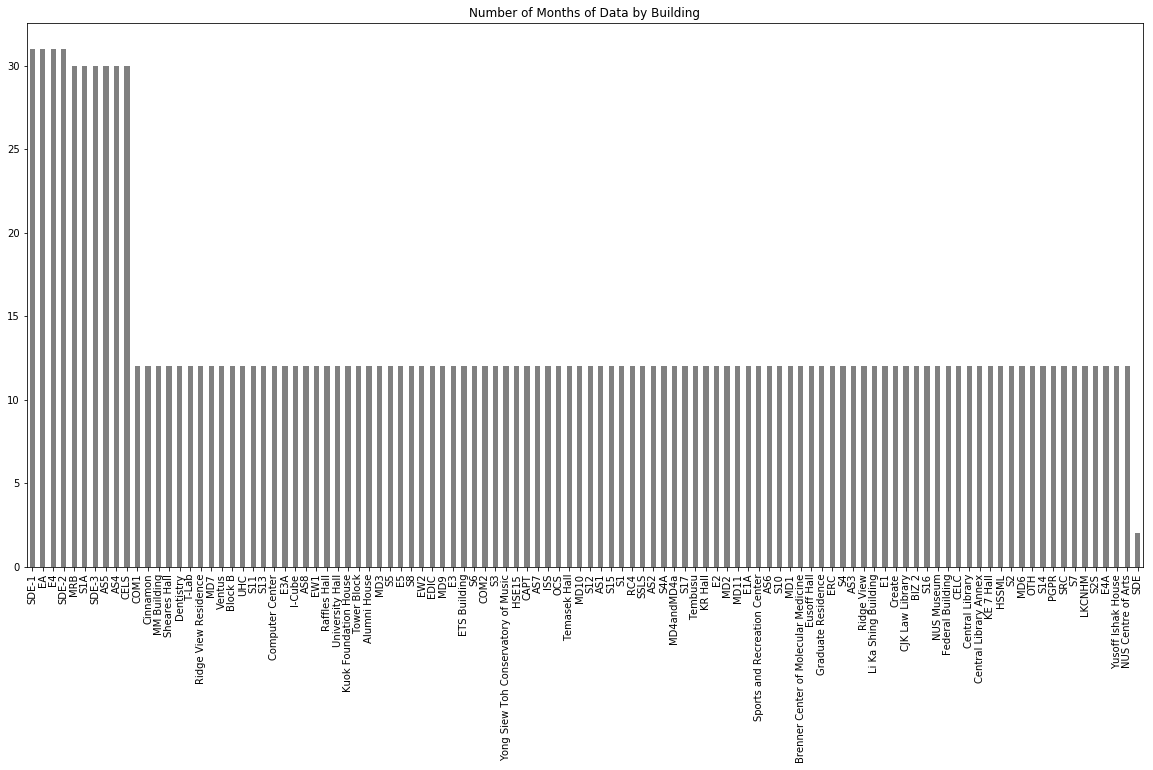

In [8]:
files_df['name'].value_counts().plot.bar(figsize=(20, 10), color='grey', title='Number of Months of Data by Building')

In [9]:
# Check the levels in the above bar chart.
print(len(files_df.loc[files_df['name'] == 'E4']),
      len(files_df.loc[files_df['name'] == 'RC4']),
      len(files_df.loc[files_df['name'] == 'SDE']))


31 12 2


## Group 1 Buildings

In [10]:
# These 4 buildings have 31 months of data.
file_cnt_by_bldg = files_df['name'].value_counts()
file_cnt_by_bldg[file_cnt_by_bldg >30].index

In [11]:
# These 6 buildings have 30 months of data.
file_cnt_by_bldg[(file_cnt_by_bldg > 29) & (file_cnt_by_bldg <= 30)].index

Index(['MRB', 'S1A', 'SDE-3', 'AS5', 'AS4', 'CELS'], dtype='object')

The above 10 buildings are the group 1 buildings. Let's look at the file sizes over months for these buildings.

In [12]:
group1_bldg = file_cnt_by_bldg[file_cnt_by_bldg > 29].index
group1_bldg

Index(['SDE-1', 'EA', 'E4', 'SDE-2', 'MRB', 'S1A', 'SDE-3', 'AS5', 'AS4',
       'CELS'],
      dtype='object')

In [13]:
# Index the data frame by year and month.
files_by_date_df = files_df.copy()
files_by_date_df['date'] = pd.to_datetime(files_by_date_df['year'].astype(str) + '/' + files_by_date_df['month'].astype(str))
files_by_date_df['date'] = files_by_date_df['date'].dt.to_period('M')

files_by_date_df.set_index(['date', 'name'], inplace=True)

In [14]:
files_by_date_df.head(10)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>year</th>
      <th>month</th>
      <th>file_size</th>
    </tr>
    <tr>
      <th>date</th>
      <th>name</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="10" valign="top">2018-05</th>
      <th>NUS Museum</th>
      <td>2018</td>
      <td>5</td>
      <td>96638</td>
    </tr>
    <tr>
      <th>Central Library Annex</th>
      <td>2018</td>
      <td>5</td>
      <td>96566</td>
    </tr>
    <tr>
      <th>Brenner Center of Molecular Medicine</th>
      <td>2018</td>
      <td>5</td>
      <td>101035</td>
    </tr>
    <tr>
      <th>SDE-2</th>
      <td>2018</td>
      <td>5</td>
      <td>77246</td>
    </tr>
    <tr>
      <th>SDE-3</th>
      <td>2018</td>
      <td>5</td>
      <td>252323</td>
    </tr>
    <tr>
      <th>S4A</th>
      <td>2018</td>
      <td>5</td>
      <td>78783</td>
    </tr>
    <tr>
      <th>E2</th>
      <td>2018</td>
      <td>5</td>
      <td>142747</td>
    </tr>
    <tr>
      <th>MM Building</th>
      <td>2018</td>
      <td>5</td>
      <td>118982</td>
    </tr>
    <tr>
      <th>E4</th>
      <td>2018</td>
      <td>5</td>
      <td>190339</td>
    </tr>
    <tr>
      <th>S17</th>
      <td>2018</td>
      <td>5</td>
      <td>142760</td>
    </tr>
  </tbody>
</table>
</div>

In [15]:
# Create the date range over which to track the file sizes. We will use this to reindex the data because there are time peroids during which there are no files i.e.
# missing rows in the data. We want to set the file size to 0 for such periods.
all_dates = pd.date_range('5/2015', '8/2018', freq='M').to_period('M')
all_dates

PeriodIndex(['2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10',
             '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04',
             '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10',
             '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
             '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10',
             '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04',
             '2018-05', '2018-06', '2018-07'],
            dtype='period[M]', freq='M')

In [16]:
# Get the existing index for building name.
name_idx = files_by_date_df.index.get_level_values(1).unique()
name_idx

Index(['NUS Museum', 'Central Library Annex',
       'Brenner Center of Molecular Medicine', 'SDE-2', 'SDE-3', 'S4A', 'E2',
       'MM Building', 'E4', 'S17',
       ...
       'EDIC', 'S5', 'S1', 'MD7', 'S16', 'ETS Building', 'OTH', 'AS6', 'SDE-1',
       'SDE'],
      dtype='object', name='name', length=106)

In [17]:
# Create the new multi index based on all the time periods by month from May 15 to Jul 18 and building name.
new_index = pd.MultiIndex.from_product([all_dates, name_idx], names=['date', 'name'])

In [18]:
# Re-index the data frame.
new_df = files_by_date_df.reindex(new_index)
new_df.sort_index(inplace=True)

In [19]:
# Check the results for 1 building. Note the NaN which are time periods with missing files.
idx = pd.IndexSlice
new_df.loc[idx[:, 'SDE-2'], 'file_size']

date     name 
2015-05  SDE-2    67315.0
2015-06  SDE-2    35827.0
2015-07  SDE-2    47092.0
2015-08  SDE-2    74274.0
2015-09  SDE-2    71862.0
2015-10  SDE-2    75656.0
2015-11  SDE-2    73300.0
2015-12  SDE-2    58850.0
2016-01  SDE-2    68809.0
2016-02  SDE-2    69246.0
2016-03  SDE-2    74274.0
2016-04  SDE-2    71862.0
2016-05  SDE-2    74274.0
2016-06  SDE-2    70806.0
2016-07  SDE-2    74274.0
2016-08  SDE-2    74274.0
2016-09  SDE-2    71862.0
2016-10  SDE-2    75864.0
2016-11  SDE-2    73300.0
2016-12  SDE-2    75456.0
2017-01  SDE-2    74274.0
2017-02  SDE-2    60958.0
2017-03  SDE-2    74274.0
2017-04  SDE-2        NaN
2017-05  SDE-2       36.0
2017-06  SDE-2        NaN
2017-07  SDE-2        NaN
2017-08  SDE-2        NaN
2017-09  SDE-2        NaN
2017-10  SDE-2        NaN
2017-11  SDE-2        NaN
2017-12  SDE-2        NaN
2018-01  SDE-2    77246.0
2018-02  SDE-2    69722.0
2018-03  SDE-2    77246.0
2018-04  SDE-2    74738.0
2018-05  SDE-2    77246.0
2018-06  SDE-2    74738

In [20]:
# Fill the NaN with zero (file size).
new_df = new_df.fillna(0)

In [21]:
# Get the data for the 10 buildings.
idx = pd.IndexSlice
group1_bldg_df = new_df.loc[idx[:, group1_bldg], 'file_size'].to_frame().sort_index()
group1_bldg_df.head(10)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>file_size</th>
    </tr>
    <tr>
      <th>date</th>
      <th>name</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="10" valign="top">2015-05</th>
      <th>AS4</th>
      <td>0.0</td>
    </tr>
    <tr>
      <th>AS5</th>
      <td>0.0</td>
    </tr>
    <tr>
      <th>CELS</th>
      <td>0.0</td>
    </tr>
    <tr>
      <th>E4</th>
      <td>46165.0</td>
    </tr>
    <tr>
      <th>EA</th>
      <td>46165.0</td>
    </tr>
    <tr>
      <th>MRB</th>
      <td>0.0</td>
    </tr>
    <tr>
      <th>S1A</th>
      <td>0.0</td>
    </tr>
    <tr>
      <th>SDE-1</th>
      <td>43480.0</td>
    </tr>
    <tr>
      <th>SDE-2</th>
      <td>67315.0</td>
    </tr>
    <tr>
      <th>SDE-3</th>
      <td>0.0</td>
    </tr>
  </tbody>
</table>
</div>

In [22]:
#Pivot the data frame for plotting.
group1_bldg_pvt_df = group1_bldg_df.unstack(-1)

In [23]:
group1_bldg_pvt_df

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="10" halign="left">file_size</th>
    </tr>
    <tr>
      <th>name</th>
      <th>AS4</th>
      <th>AS5</th>
      <th>CELS</th>
      <th>E4</th>
      <th>EA</th>
      <th>MRB</th>
      <th>S1A</th>
      <th>SDE-1</th>
      <th>SDE-2</th>
      <th>SDE-3</th>
    </tr>
    <tr>
      <th>date</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2015-05</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>46165.0</td>
      <td>46165.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>43480.0</td>
      <td>67315.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2015-06</th>
      <td>44157.0</td>
      <td>51384.0</td>
      <td>51881.0</td>
      <td>75082.0</td>
      <td>60033.0</td>
      <td>32614.0</td>
      <td>59510.0</td>
      <td>42445.0</td>
      <td>35827.0</td>
      <td>132928.0</td>
    </tr>
    <tr>
      <th>2015-07</th>
      <td>85815.0</td>
      <td>99887.0</td>
      <td>93191.0</td>
      <td>120588.0</td>
      <td>89430.0</td>
      <td>63170.0</td>
      <td>107351.0</td>
      <td>59323.0</td>
      <td>47092.0</td>
      <td>181787.0</td>
    </tr>
    <tr>
      <th>2015-08</th>
      <td>135340.0</td>
      <td>157667.0</td>
      <td>147127.0</td>
      <td>190339.0</td>
      <td>141277.0</td>
      <td>99608.0</td>
      <td>169397.0</td>
      <td>93628.0</td>
      <td>74274.0</td>
      <td>303374.0</td>
    </tr>
    <tr>
      <th>2015-09</th>
      <td>133288.0</td>
      <td>154895.0</td>
      <td>142363.0</td>
      <td>184183.0</td>
      <td>136732.0</td>
      <td>96380.0</td>
      <td>164030.0</td>
      <td>90592.0</td>
      <td>71862.0</td>
      <td>293570.0</td>
    </tr>
    <tr>
      <th>2015-10</th>
      <td>139801.0</td>
      <td>162128.0</td>
      <td>148613.0</td>
      <td>191826.0</td>
      <td>142764.0</td>
      <td>100129.0</td>
      <td>170961.0</td>
      <td>95065.0</td>
      <td>75656.0</td>
      <td>304774.0</td>
    </tr>
    <tr>
      <th>2015-11</th>
      <td>135089.0</td>
      <td>156666.0</td>
      <td>143801.0</td>
      <td>185622.0</td>
      <td>140692.0</td>
      <td>91295.0</td>
      <td>165449.0</td>
      <td>92005.0</td>
      <td>73300.0</td>
      <td>294974.0</td>
    </tr>
    <tr>
      <th>2015-12</th>
      <td>108512.0</td>
      <td>125859.0</td>
      <td>115533.0</td>
      <td>149019.0</td>
      <td>113121.0</td>
      <td>77874.0</td>
      <td>132872.0</td>
      <td>73889.0</td>
      <td>58850.0</td>
      <td>236981.0</td>
    </tr>
    <tr>
      <th>2016-01</th>
      <td>124393.0</td>
      <td>145055.0</td>
      <td>136223.0</td>
      <td>176231.0</td>
      <td>122565.0</td>
      <td>92256.0</td>
      <td>156983.0</td>
      <td>86539.0</td>
      <td>68809.0</td>
      <td>280468.0</td>
    </tr>
    <tr>
      <th>2016-02</th>
      <td>124554.0</td>
      <td>145047.0</td>
      <td>137199.0</td>
      <td>178812.0</td>
      <td>134373.0</td>
      <td>92932.0</td>
      <td>158038.0</td>
      <td>87300.0</td>
      <td>69246.0</td>
      <td>274470.0</td>
    </tr>
    <tr>
      <th>2016-03</th>
      <td>133853.0</td>
      <td>156180.0</td>
      <td>147127.0</td>
      <td>187938.0</td>
      <td>127874.0</td>
      <td>99608.0</td>
      <td>169091.0</td>
      <td>93629.0</td>
      <td>74274.0</td>
      <td>303375.0</td>
    </tr>
    <tr>
      <th>2016-04</th>
      <td>129521.0</td>
      <td>1511

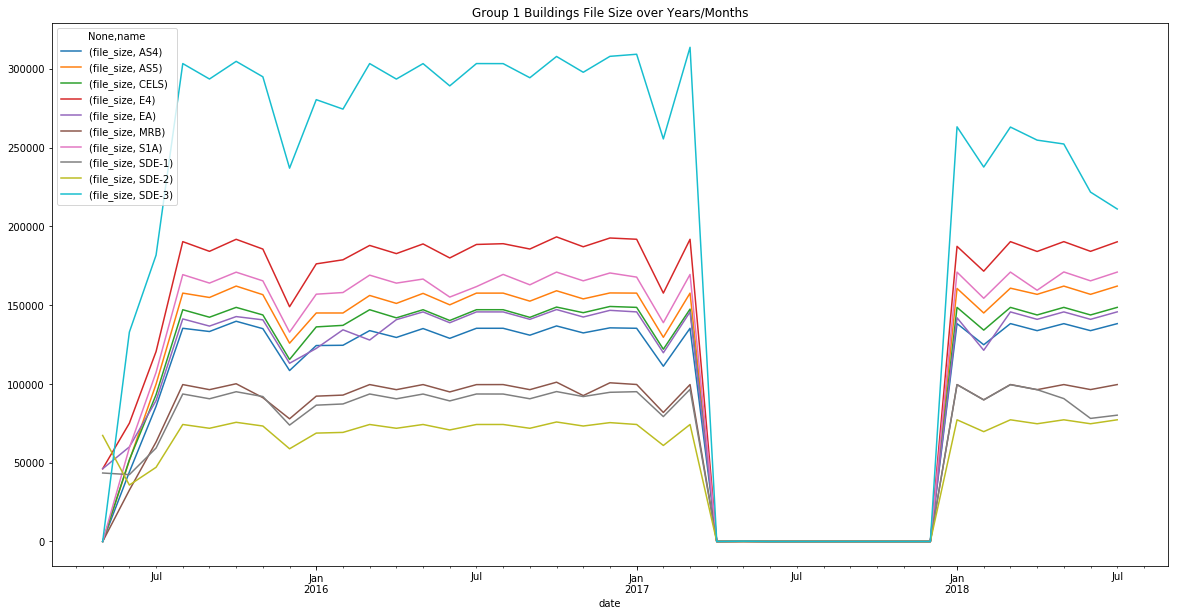

In [24]:
group1_bldg_pvt_df.plot(figsize=(20, 10), title='Group 1 Buildings File Size over Years/Months')

In [25]:
# Look at the periods of total data outage (i.e. for file size = 0)
group1_bldg_df.loc[(group1_bldg_df['file_size'] == 0)].index.get_level_values(0).unique()

PeriodIndex(['2015-05', '2017-04', '2017-06', '2017-07', '2017-08', '2017-09',
             '2017-10', '2017-11', '2017-12'],
            dtype='period[M]', name='date', freq='M')

In [26]:
# For each period, look at the number of buildings with missing files.
group1_bldg_df.loc[(group1_bldg_df['file_size'] == 0)].index.get_level_values(0).value_counts().sort_index()

2015-05     6
2017-04    10
2017-06    10
2017-07    10
2017-08    10
2017-09    10
2017-10    10
2017-11    10
2017-12    10
Freq: M, Name: date, dtype: int64

The plot shows that the file sizes are not constant over time, likely indicating missing data as the data should comprise regular readings from the resource meters (which should produce constant file sizes).

The periods of **data outage** are :
* May 15 for 6 buildings
* Apr 17, Jun 17 to Dec 17 for all buildings; in May 17 all buildings have very small files.

The file sizes for SDE-3 appears different (lower) after the data outage Apr-Dec 17.

## Group 2 Buildings

In [27]:
# From the earlier bar chart, these 95 buildings have 12 months of data.
len(file_cnt_by_bldg[(file_cnt_by_bldg > 11) & (file_cnt_by_bldg < 29)].index)

95

In [28]:
pd.options.display.max_seq_items = 150
group2_bldg = file_cnt_by_bldg[(file_cnt_by_bldg > 11) & (file_cnt_by_bldg < 29)].index
group2_bldg

Index(['COM1', 'Cinnamon', 'MM Building', 'Sheares Hall', 'Dentistry', 'T-Lab',
       'Ridge View Residence', 'MD7', 'Ventus', 'Block B', 'UHC', 'S11', 'S13',
       'Computer Center', 'E3A', 'I-Cube', 'AS8', 'EW1', 'Raffles Hall',
       'University Hall', 'Kuok Foundation House', 'Tower Block',
       'Alumni House', 'MD3', 'S5', 'E5', 'S8', 'EW2', 'EDIC', 'MD9', 'E3',
       'ETS Building', 'S6', 'COM2', 'S3',
       'Yong Siew Toh Conservatory of Music', 'HSE15', 'CAPT', 'AS7', 'ISS',
       'OCS', 'Temasek Hall', 'MD10', 'S12', 'AS1', 'S15', 'S1', 'RC4', 'SSLS',
       'AS2', 'S4A', 'MD4andMD4a', 'S17', 'Tembusu', 'KR Hall', 'E2', 'MD2',
       'MD11', 'E1A', 'Sports and Recreation Center', 'AS6', 'S10', 'MD1',
       'Brenner Center of Molecular Medicine', 'Eusoff Hall',
       'Graduate Residence', 'ERC', 'S4', 'AS3', 'Ridge View',
       'Li Ka Shing Building', 'E1', 'Create', 'CJK Law Library', 'BIZ 2',
       'S16', 'NUS Museum', 'Federal Building', 'CELC', 'Central Library'

In [29]:
# Get the data for the 95 buildings.
idx = pd.IndexSlice
group2_bldg_df = (new_df.loc[idx[:, group2_bldg], 'file_size']).to_frame()
group2_bldg_df.columns = ['file_size']
group2_bldg_df.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>file_size</th>
    </tr>
    <tr>
      <th>date</th>
      <th>name</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">2015-05</th>
      <th>AS1</th>
      <td>0.0</td>
    </tr>
    <tr>
      <th>AS2</th>
      <td>0.0</td>
    </tr>
    <tr>
      <th>AS3</th>
      <td>0.0</td>
    </tr>
    <tr>
      <th>AS6</th>
      <td>0.0</td>
    </tr>
    <tr>
      <th>AS7</th>
      <td>0.0</td>
    </tr>
  </tbody>
</table>
</div>

In [30]:
#Pivot the data frame for plotting.
group2_bldg_pvt_df = group2_bldg_df.unstack(-1)

In [31]:
# View a slice of the time series with file sizes > 0 for a sample of buildings.
group2_bldg_pvt_df.iloc[18:, :10]

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="10" halign="left">file_size</th>
    </tr>
    <tr>
      <th>name</th>
      <th>AS1</th>
      <th>AS2</th>
      <th>AS3</th>
      <th>AS6</th>
      <th>AS7</th>
      <th>AS8</th>
      <th>Alumni House</th>
      <th>BIZ 2</th>
      <th>Block B</th>
      <th>Brenner Center of Molecular Medicine</th>
    </tr>
    <tr>
      <th>date</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2016-11</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2016-12</th>
      <td>88114.0</td>
      <td>113350.0</td>
      <td>72412.0</td>
      <td>58153.0</td>
      <td>74551.0</td>
      <td>66374.0</td>
      <td>70187.0</td>
      <td>102892.0</td>
      <td>113351.0</td>
      <td>94976.0</td>
    </tr>
    <tr>
      <th>2017-01</th>
      <td>99616.0</td>
      <td>160630.0</td>
      <td>96659.0</td>
      <td>77253.0</td>
      <td>99561.0</td>
      <td>90701.0</td>
      <td>96664.0</td>
      <td>138427.0</td>
      <td>156114.0</td>
      <td>99549.0</td>
    </tr>
    <tr>
      <th>2017-02</th>
      <td>81862.0</td>
      <td>132052.0</td>
      <td>79393.0</td>
      <td>63407.0</td>
      <td>81740.0</td>
      <td>74531.0</td>
      <td>79371.0</td>
      <td>113714.0</td>
      <td>128194.0</td>
      <td>81728.0</td>
    </tr>
    <tr>
      <th>2017-03</th>
      <td>99616.0</td>
      <td>160630.0</td>
      <td>96633.0</td>
      <td>77253.0</td>
      <td>99561.0</td>
      <td>90701.0</td>
      <td>96584.0</td>
      <td>138239.0</td>
      <td>156197.0</td>
      <td>98807.0</td>
    </tr>
    <tr>
      <th>2017-04</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2017-05</th>
      <td>48.0</td>
      <td>95.0</td>
      <td>53.0</td>
      <td>43.0</td>
      <td>61.0</td>
      <td>55.0</td>
      <td>56.0</td>
      <td>103.0</td>
      <td>117.0</td>
      <td>49.0</td>
    </tr>
    <tr>
      <th>2017-06</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2017-07</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2017-08</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2017-09</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2017-10</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2017-11</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>

Plot the file size over year/month for a sample of the buildings.

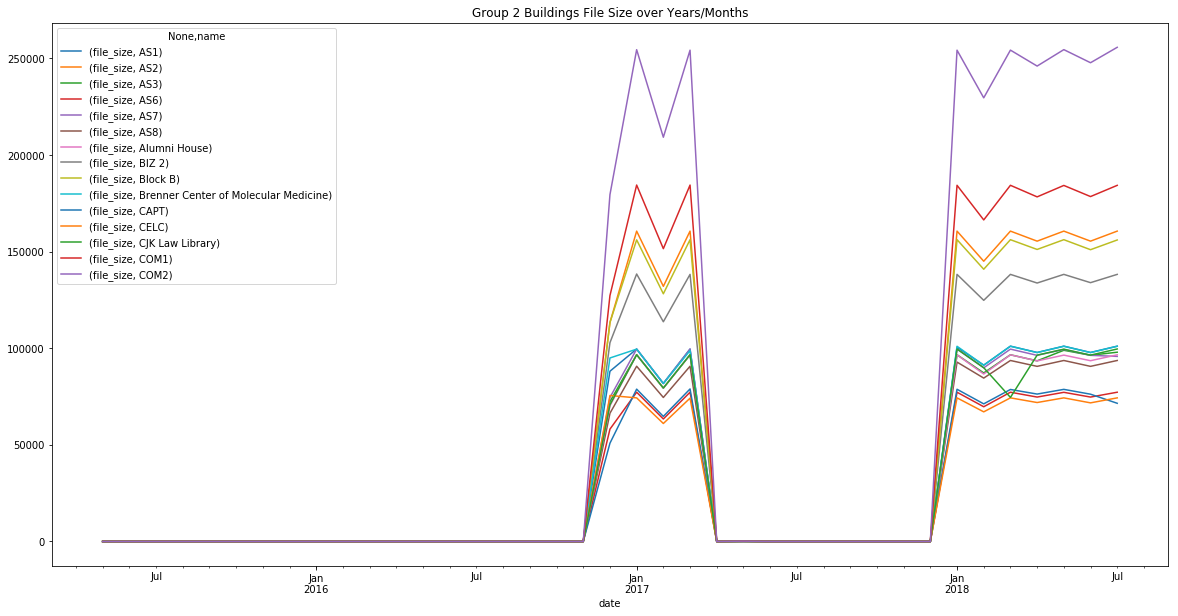

In [32]:
group2_bldg_pvt_df.iloc[:, :15].plot(figsize=(20, 10), title='Group 2 Buildings File Size over Years/Months')

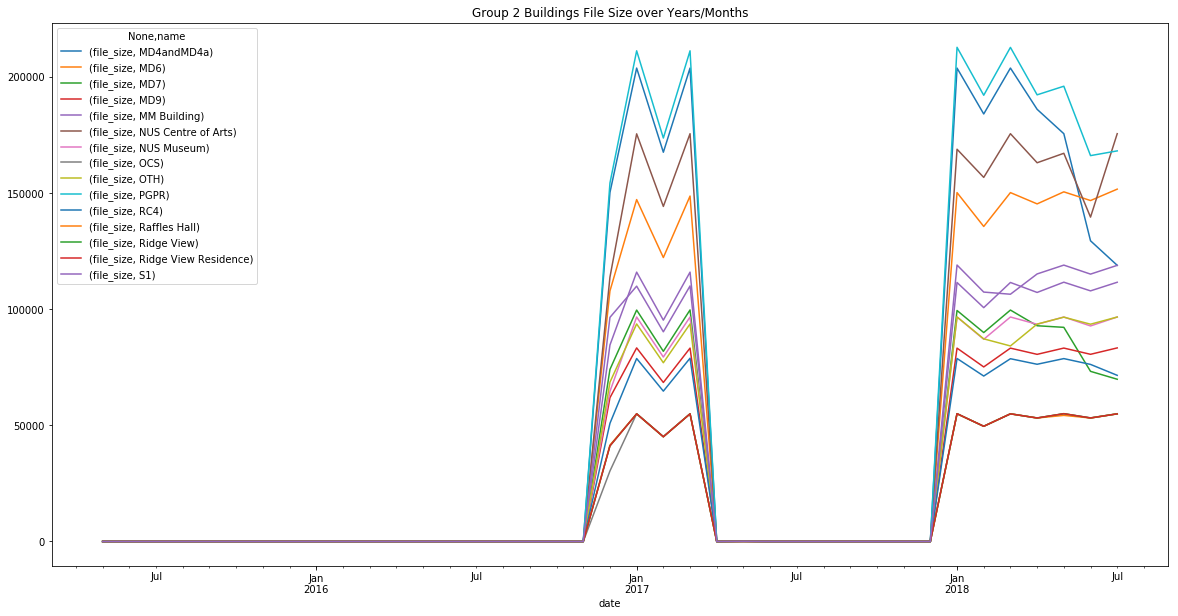

In [33]:
group2_bldg_pvt_df.iloc[:, 50:65].plot(figsize=(20, 10), title='Group 2 Buildings File Size over Years/Months')

There appears to be some large data losses for the building MD4&MD4A.

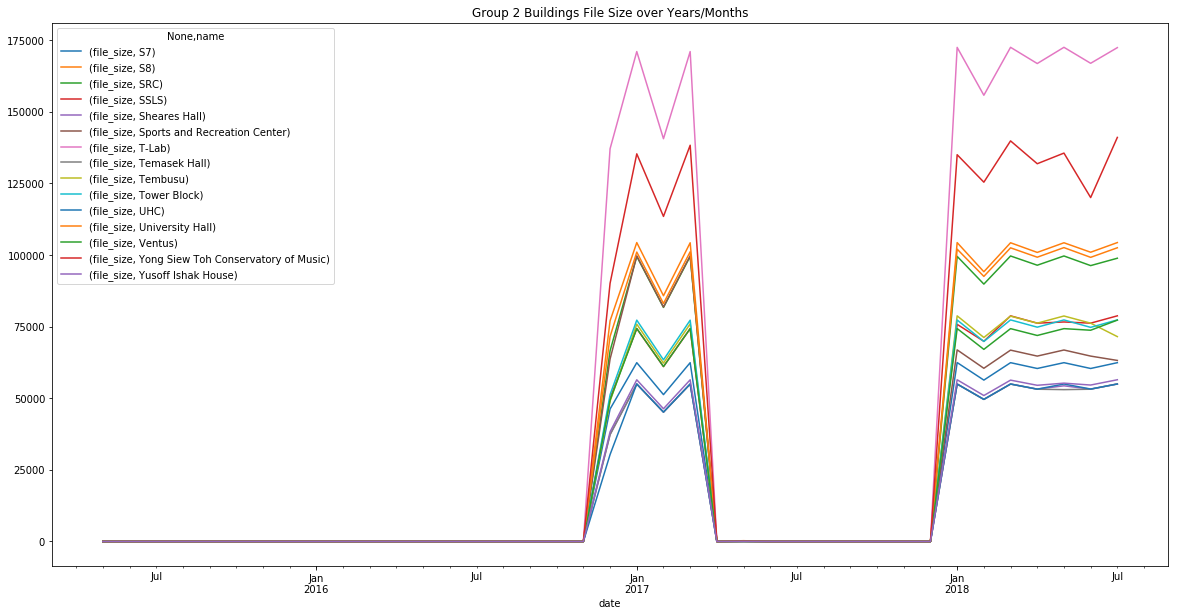

In [34]:
group2_bldg_pvt_df.iloc[:, 80:95].plot(figsize=(20, 10), title='Group 2 Buildings File Size over Years/Months')

In [35]:
# Look at the periods of total data outage (i.e. for file size = 0)
group2_bldg_df.loc[(group2_bldg_df['file_size'] == 0)].index.get_level_values(0).unique()

PeriodIndex(['2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10',
             '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04',
             '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10',
             '2016-11', '2017-04', '2017-06', '2017-07', '2017-08', '2017-09',
             '2017-10', '2017-11', '2017-12'],
            dtype='period[M]', name='date', freq='M')

In [36]:
# For each period, look at the number of buildings with missing files.
group2_bldg_df.loc[(group2_bldg_df['file_size'] == 0)].index.get_level_values(0).value_counts().sort_index()

2015-05    95
2015-06    95
2015-07    95
2015-08    95
2015-09    95
2015-10    95
2015-11    95
2015-12    95
2016-01    95
2016-02    95
2016-03    95
2016-04    95
2016-05    95
2016-06    95
2016-07    95
2016-08    95
2016-09    95
2016-10    95
2016-11    95
2017-04    95
2017-06    95
2017-07    95
2017-08    95
2017-09    95
2017-10    95
2017-11    95
2017-12    95
Freq: M, Name: date, dtype: int64

The periods of complete **data outage** for all group 2 buildings are :
* May 15 to Nov 16
* Apr 17, Jun 17 to Dec 17; in May 17 all buildings have very small files.

There appear to be some buidings with large data losses (previously mentioned MD4). They will be looked into in a later analysis.

## Outliers - Small files, few files

In [37]:
# Look into building name = SDE. There is data only for May, Jun 2015.
files_df.loc[files_df['name'] == 'SDE']

,name,year,month,file_size
831,SDE,2015,6,41049
1278,SDE,2015,5,152113


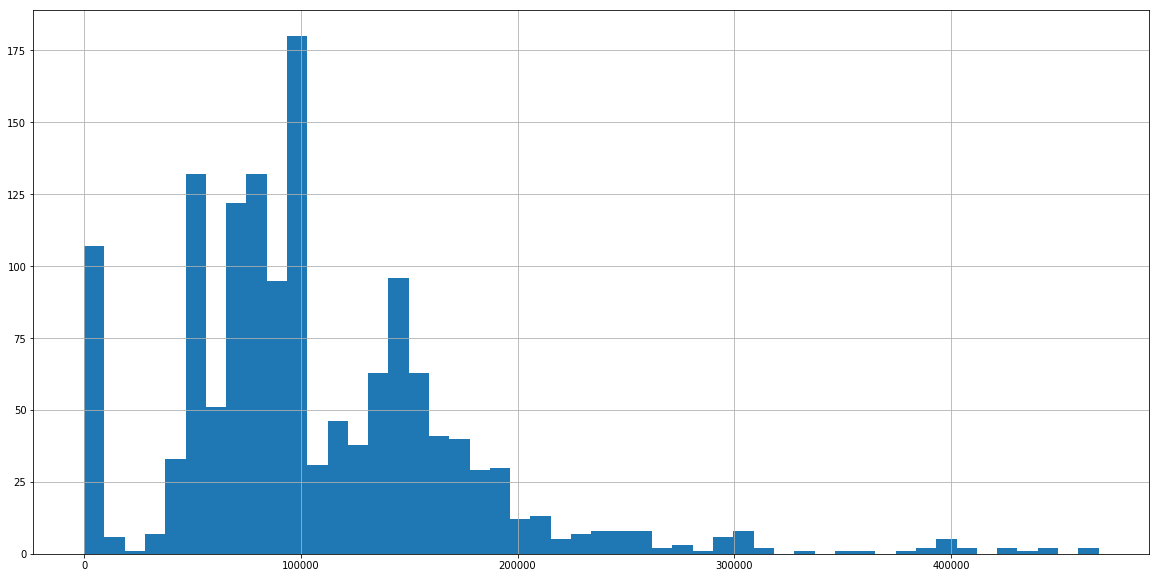

In [38]:
# Plot the frequency distribution of file sizes.
files_df['file_size'].hist(bins=50, figsize=(20, 10))

In [39]:
# Look into the small files (< 30KB). From the files size by year/month charts, file sizes are typically bigger than 30KB.
small_file_size_df = new_df.loc[(new_df['file_size'] < 30000) & (new_df['file_size'] > 0)]
small_file_size_df

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>year</th>
      <th>month</th>
      <th>file_size</th>
    </tr>
    <tr>
      <th>date</th>
      <th>name</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2016-12</th>
      <th>HSE15</th>
      <td>2016.0</td>
      <td>12.0</td>
      <td>27976.0</td>
    </tr>
    <tr>
      <th>2017-03</th>
      <th>S12</th>
      <td>2017.0</td>
      <td>3.0</td>
      <td>6743.0</td>
    </tr>
    <tr>
      <th rowspan="52" valign="top">2017-05</th>
      <th>AS1</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>48.0</td>
    </tr>
    <tr>
      <th>AS2</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>95.0</td>
    </tr>
    <tr>
      <th>AS3</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>53.0</td>
    </tr>
    <tr>
      <th>AS4</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>84.0</td>
    </tr>
    <tr>
      <th>AS5</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>106.0</td>
    </tr>
    <tr>
      <th>AS6</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>43.0</td>
    </tr>
    <tr>
      <th>AS7</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>61.0</td>
    </tr>
    <tr>
      <th>AS8</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>55.0</td>
    </tr>
    <tr>
      <th>Alumni House</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>56.0</td>
    </tr>
    <tr>
      <th>BIZ 2</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>103.0</td>
    </tr>
    <tr>
      <th>Block B</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>117.0</td>
    </tr>
    <tr>
      <th>Brenner Center of Molecular Medicine</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>49.0</td>
    </tr>
    <tr>
      <th>CAPT</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>35.0</td>
    </tr>
    <tr>
      <th>CELC</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>40.0</td>
    </tr>
    <tr>
      <th>CELS</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>75.0</td>
    </tr>
    <tr>
      <th>CJK Law Library</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>62.0</td>
    </tr>
    <tr>
      <th>COM1</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>112.0</td>
    </tr>
    <tr>
      <th>COM2</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>178.0</td>
    </tr>
    <tr>
      <th>Central Library</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>144.0</td>
    </tr>
    <tr>
      <th>Central Library Annex</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>56.0</td>
    </tr>
    <tr>
      <th>Cinnamon</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>35.0</td>
    </tr>
    <tr>
      <th>Computer Center</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>115.0</td>
    </tr>
    <tr>
      <th>Create</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>424.0</td>
    </tr>
    <tr>
      <th>Dentistry</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>50.0</td>
    </tr>
    <tr>
      <th>E1</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>129.0</td>
    </tr>
    <tr>
      <th>E1A</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>78.0</td>
    </tr>
    <tr>
      <th>E2</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>68.0</td>
    </tr>
    <tr>
      <th>E3</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>43.0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>S3</th>
      <td>2017.0</td>
      <td>5.0</td>
      <td>59.0</td>
    </tr>
    <tr>
      <th>S4</th>
      <td>2017.0</td>
    

In [40]:
# Find the time periods with small files.
small_file_size_df.index.get_level_values(0).unique()

PeriodIndex(['2016-12', '2017-03', '2017-05', '2018-01', '2018-02', '2018-03',
             '2018-04', '2018-05', '2018-06', '2018-07'],
            dtype='period[M]', name='date', freq='M')

In [41]:
# Find the buildings with small files.
small_file_size_df.index.get_level_values(1).unique()

Index(['HSE15', 'S12', 'AS1', 'AS2', 'AS3', 'AS4', 'AS5', 'AS6', 'AS7', 'AS8',
       'Alumni House', 'BIZ 2', 'Block B',
       'Brenner Center of Molecular Medicine', 'CAPT', 'CELC', 'CELS',
       'CJK Law Library', 'COM1', 'COM2', 'Central Library',
       'Central Library Annex', 'Cinnamon', 'Computer Center', 'Create',
       'Dentistry', 'E1', 'E1A', 'E2', 'E3', 'E3A', 'E4', 'E4A', 'E5', 'EA',
       'EDIC', 'ERC', 'ETS Building', 'EW1', 'EW2', 'Eusoff Hall',
       'Federal Building', 'Graduate Residence', 'HSSML', 'I-Cube', 'ISS',
       'KE 7 Hall', 'KR Hall', 'Kuok Foundation House', 'LKCNHM',
       'Li Ka Shing Building', 'MD1', 'MD10', 'MD11', 'MD2', 'MD3',
       'MD4andMD4a', 'MD6', 'MD7', 'MD9', 'MM Building', 'MRB',
       'NUS Centre of Arts', 'NUS Museum', 'OCS', 'OTH', 'PGPR', 'RC4',
       'Raffles Hall', 'Ridge View', 'Ridge View Residence', 'S1', 'S10',
       'S11', 'S13', 'S14', 'S15', 'S16', 'S17', 'S1A', 'S2', 'S2S', 'S3',
       'S4', 'S4A', 'S5', 'S6', 'S7

In [42]:
# All the buildings have had small files.
len(small_file_size_df.index.get_level_values(1).unique())

105

In [43]:
# Find the affected buildings for each of the above time periods.
mylist = []
for a_time in small_file_size_df.index.get_level_values(0).unique():
    bldgs = small_file_size_df.loc[(slice(a_time, a_time), slice(None)), 'file_size'].index.get_level_values(1).unique()
    mylist.append([a_time, len(bldgs), bldgs])
mylist

[[Period('2016-12', 'M'), 1, Index(['HSE15'], dtype='object', name='name')],
 [Period('2017-03', 'M'), 1, Index(['S12'], dtype='object', name='name')],
 [Period('2017-05', 'M'),
  105,
  Index(['AS1', 'AS2', 'AS3', 'AS4', 'AS5', 'AS6', 'AS7', 'AS8', 'Alumni House',
         'BIZ 2', 'Block B', 'Brenner Center of Molecular Medicine', 'CAPT',
         'CELC', 'CELS', 'CJK Law Library', 'COM1', 'COM2', 'Central Library',
         'Central Library Annex', 'Cinnamon', 'Computer Center', 'Create',
         'Dentistry', 'E1', 'E1A', 'E2', 'E3', 'E3A', 'E4', 'E4A', 'E5', 'EA',
         'EDIC', 'ERC', 'ETS Building', 'EW1', 'EW2', 'Eusoff Hall',
         'Federal Building', 'Graduate Residence', 'HSE15', 'HSSML', 'I-Cube',
         'ISS', 'KE 7 Hall', 'KR Hall', 'Kuok Foundation House', 'LKCNHM',
         'Li Ka Shing Building', 'MD1', 'MD10', 'MD11', 'MD2', 'MD3',
         'MD4andMD4a', 'MD6', 'MD7', 'MD9', 'MM Building', 'MRB',
         'NUS Centre of Arts', 'NUS Museum', 'OCS', 'OTH', 'PGPR'

From the earlier file size by year/month charts for group 1 and 2 buildings, we know that :
* before May 15, there was no data
* there were complete data outages from Apr 17 to Nov 17 (except May 17 with little data)

These are the buildings affected by major data loss (small files) :
* Dec 16 - HSE15
* Mar 17 - S12
* May 17 - all
* Jan-Jul 17 - S10